In [8]:
import os
import sys
from pathlib import Path

# For Jupyter Notebook/IPython - use current directory as project root
project_root = Path(os.getcwd()).parent  # Goes up one level from current directory
sys.path.insert(0, str(project_root))

print(f"[DEBUG] Project root: {project_root}")
print(f"[DEBUG] Current working directory: {os.getcwd()}")

from src.data_processing.data_loader import DataLoader
from src.data_processing.signal_preprocessing import SignalProcessor

# Load and preprocess data
try:
    raw_data_path = project_root / 'data' / 'raw'
    print(f"[DEBUG] Attempting to load data from: {raw_data_path}")
    
    loader = DataLoader(raw_data_path)
    signals, labels = loader.load()
    
    processor = SignalProcessor()
    processed_signals = [processor.process(sig) for sig in signals]
    
    print("[SUCCESS] Data processed successfully!")
except Exception as e:
    print(f"[ERROR] Failed to process data: {str(e)}")
    raise

[DEBUG] Project root: c:\Users\LOLLA SRIKANTH\OneDrive - iitr.ac.in\Desktop\DEBONDING-DETECTION-SHM
[DEBUG] Current working directory: c:\Users\LOLLA SRIKANTH\OneDrive - iitr.ac.in\Desktop\DEBONDING-DETECTION-SHM\notebooks
[DEBUG] Attempting to load data from: c:\Users\LOLLA SRIKANTH\OneDrive - iitr.ac.in\Desktop\DEBONDING-DETECTION-SHM\data\raw
[DEBUG] Attempting to read data from: c:\Users\LOLLA SRIKANTH\OneDrive - iitr.ac.in\Desktop\DEBONDING-DETECTION-SHM\data\raw
[DEBUG] Found files: ['labels.csv', 'signal_0.npy', 'signal_1.npy', 'signal_10.npy', 'signal_100.npy', 'signal_101.npy', 'signal_102.npy', 'signal_103.npy', 'signal_104.npy', 'signal_105.npy', 'signal_106.npy', 'signal_107.npy', 'signal_108.npy', 'signal_109.npy', 'signal_11.npy', 'signal_110.npy', 'signal_111.npy', 'signal_112.npy', 'signal_113.npy', 'signal_114.npy', 'signal_115.npy', 'signal_116.npy', 'signal_117.npy', 'signal_118.npy', 'signal_119.npy', 'signal_12.npy', 'signal_120.npy', 'signal_121.npy', 'signal_122.

In [9]:
from src.data_processing.data_augmentation import DataAugmenter

augmenter = DataAugmenter()
augmented_signals = []
augmented_zones = []
augmented_sizes = []

for signal, zone, size in zip(processed_signals, labels['zone'], labels['size']):
    augmented = augmenter.augment_signal(signal,use_time_warp=True,use_random_noise=True)
    augmented_signals.extend(augmented)
    augmented_zones.extend([zone] * len(augmented))
    augmented_sizes.extend([size] * len(augmented))

In [10]:
from src.feature_extraction.harmonic_features import HarmonicFeatureExtractor
import numpy as np
from tqdm import tqdm

extractor = HarmonicFeatureExtractor()
features = np.array([
    list(extractor.extract(signal).values())
    for signal in tqdm(augmented_signals, desc="Extracting features")
])

Extracting features: 100%|██████████| 72/72 [00:00<00:00, 24005.56it/s]


c:\Users\LOLLA SRIKANTH\OneDrive - iitr.ac.in\Desktop\DEBONDING-DETECTION-SHM\.venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Autoencoder configuration loaded:
Input shape: (3750, 1)
Target output length: 3750


Final Model Verification:
Input shape: (None, 3750, 1)
Output shape: (None, 3750, 1)

Autoencoder Architecture:


Model: "DCAE"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 3750, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 1875, 64)  │      1,024 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 1875, 64)  │          0 │ conv1d[0][0]      │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 1875, 64)  │        256 │ leaky_re_lu[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1875, 64)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 938, 128)  │     57,472 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 938, 128)  │          0 │ conv1d_1[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 938, 128)  │        512 │ leaky_re_lu_1[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 938, 128)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 469, 256)  │    164,096 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 469, 256)  │          0 │ conv1d_2[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 469, 256)  │      1,024 │ leaky_re_lu_2[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 469, 256)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 235, 512)  │    393,728 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 235, 512)  │          0 │ conv1d_3[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 235, 512)  │      2,048 │ leaky_re_lu_3[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 235, 512)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ dropout_3[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bottleneck (Dense)  │ (None, 256)       │    131,328 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 512)       │    131,584 │ bottleneck[0][0]

 Total params: 3,188,241 (12.16 MB)

 Trainable params: 3,184,401 (12.15 MB)

 Non-trainable params: 3,840 (15.00 KB)


Encoder Architecture:


Model: "Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3750, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1875, 64)       │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 1875, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1875, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1875, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 938, 128)       │        57,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 938, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 938, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 938, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 469, 256)       │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 469, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 469, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 469, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 235, 512)       │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 235, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 235, 512)       │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 235, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 256)            │       131,328 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 751,488 (2.87 MB)

 Trainable params: 749,568 (2.86 MB)

 Non-trainable params: 1,920 (7.50 KB)


Preparing training data...
Starting training...
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 0.3632 - mae: 0.2819 - val_loss: 0.3638 - val_mae: 0.2851 - learning_rate: 1.0000e-04
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 0.3507 - mae: 0.2670 - val_loss: 0.3619 - val_mae: 0.2849 - learning_rate: 1.0000e-04
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - loss: 0.3432 - mae: 0.2591 - val_loss: 0.3588 - val_mae: 0.2836 - learning_rate: 1.0000e-04
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - loss: 0.3372 - mae: 0.2535 - val_loss: 0.3550 - val_mae: 0.2817 - learning_rate: 1.0000e-04
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - loss: 0.3324 - mae: 0.2496 - val_loss: 0.3508 - val_mae: 0.2794 - learning_rate: 1.0000e-04
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 0.3280 - mae: 0.2466 - val_loss: 0.3464 - val_mae: 0.2771 - learning_rate: 1.0000e-04
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.3239 - mae: 0.2440 - val_loss: 0.3419 -

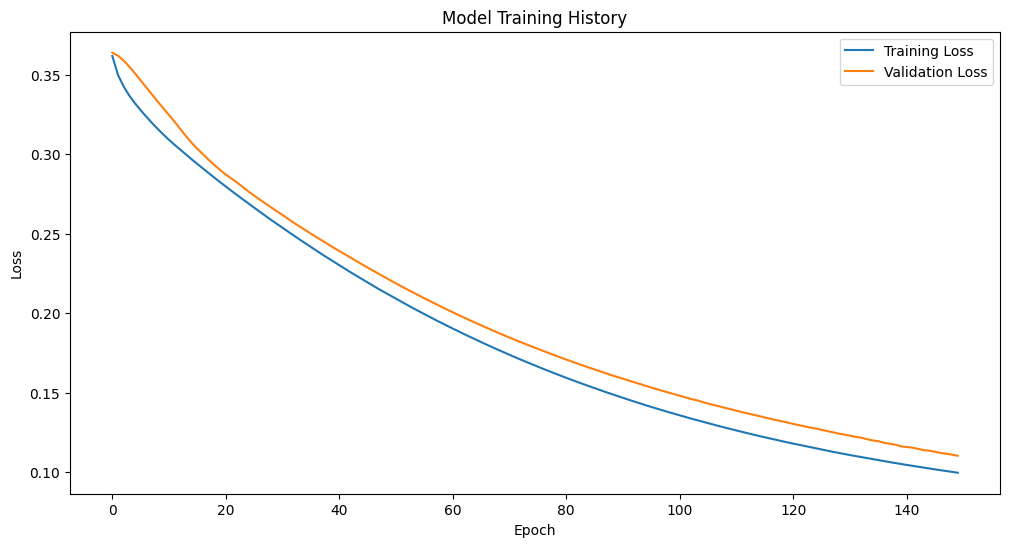

In [11]:
from src.config import CONFIG
from src.models.autoencoder import build_dcae
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from src.evaluation.visualization import plot_learning_curve
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Cropping1D, UpSampling1D

# 1. Load and verify configuration
print("Autoencoder configuration loaded:")
print(f"Input shape: {CONFIG['autoencoder']['input_shape']}")
print(f"Target output length: 3750")

# 2. Build and adjust model dimensions
autoencoder, encoder = build_dcae()

# 3. Automatic dimension adjustment
current_output_len = autoencoder.output_shape[1]
target_output_len = CONFIG['autoencoder']['input_shape'][0]

if current_output_len != target_output_len:
    print(f"\nAdjusting model output from {current_output_len} to {target_output_len} samples")
    
    input_layer = autoencoder.input
    decoded = autoencoder.output
    
    # Calculate exact adjustment needed
    size_diff = target_output_len - current_output_len
    
    if size_diff > 0:  # Need to expand
        upsample_factor = int(np.ceil(target_output_len / current_output_len))
        print(f"Adding UpSampling1D with factor {upsample_factor}")
        decoded = UpSampling1D(size=upsample_factor)(decoded)
        
        # Crop if we overshot
        if decoded.shape[1] > target_output_len:
            crop_amount = decoded.shape[1] - target_output_len
            print(f"Adding Cropping1D to remove {crop_amount} samples")
            decoded = Cropping1D((0, crop_amount))(decoded)
    else:  # Need to shrink
        crop_amount = -size_diff
        print(f"Adding Cropping1D to remove {crop_amount} samples")
        decoded = Cropping1D((0, crop_amount))(decoded)
    
    # Rebuild models with adjusted output
    autoencoder = Model(input_layer, decoded, name='DCAE_with_Adjustment')
    
    # Rebuild encoder using the original bottleneck layer
    # (Assuming the bottleneck is the layer before the first decoder layer)
    encoder_layer = autoencoder.layers[-len(CONFIG['autoencoder']['decoder_layers'])-1]
    encoder = Model(input_layer, encoder_layer.output, name='Encoder')

    # Recompile the model
    autoencoder.compile(
        optimizer=CONFIG['autoencoder']['optimizer'],
        loss=CONFIG['autoencoder']['loss'],
        metrics=CONFIG['autoencoder']['metrics']
    )

# 4. Final verification
print("\nFinal Model Verification:")
print(f"Input shape: {autoencoder.input_shape}")
print(f"Output shape: {autoencoder.output_shape}")
assert autoencoder.input_shape[1] == autoencoder.output_shape[1], \
    f"Dimension mismatch! Input length {autoencoder.input_shape[1]} != Output length {autoencoder.output_shape[1]}"

# 5. Model summaries
print("\nAutoencoder Architecture:")
autoencoder.summary()

print("\nEncoder Architecture:")
encoder.summary()

# 6. Prepare and train
print("\nPreparing training data...")
features = np.random.rand(100, 3750)  # Replace with your actual data
train_data = features.reshape((-1, 3750, 1))

print("Starting training...")
history = autoencoder.fit(
    train_data,
    train_data,
    epochs=CONFIG['autoencoder']['epochs'],
    batch_size=CONFIG['autoencoder']['batch_size'],
    validation_split=CONFIG['autoencoder']['validation_split'],
    callbacks=[
        EarlyStopping(
            patience=CONFIG['autoencoder']['patience'],
            restore_best_weights=True
        ),
        ReduceLROnPlateau(
            factor=0.5,
            patience=CONFIG['autoencoder']['reduce_lr_patience']
        )
    ]
)

# 7. Plot results
print("\nTraining complete. Generating learning curves...")
plot_learning_curve(history)

In [16]:
import os
import sys
sys.path.insert(0, os.path.abspath('..')) 

from src.models.stacked_model import build_stacked_model
from src.evaluation.metrics import evaluate_classification
from src.evaluation.visualization import plot_learning_curve
from src.evaluation.visualization import plot_confusion_matrix

import numpy as np

# Debug shapes
print(f"Input features shape: {features.shape}")
print(f"augmented_zones length: {len(augmented_zones)}")

# Compress features
compressed_features = encoder.predict(features.reshape((-1, 3750, 1)))
print(f"Compressed features shape: {compressed_features.shape}")

print(f"Before alignment - compressed_features: {compressed_features.shape}")
print(f"Before alignment - augmented_zones: {len(augmented_zones)}")

# ALIGN DATA: Keep only first 72 samples
compressed_features = compressed_features[:72]  # Now shape: [72, 256]

# Ensure equal lengths
assert len(compressed_features) == len(augmented_zones), \
       f"Mismatch: {len(compressed_features)} features vs {len(augmented_zones)} labels"

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    compressed_features, 
    augmented_zones, 
    test_size=0.2, 
    random_state=42
    # stratify=augmented_zones
)

print(f"\nAfter splitting:")
print(f"X_train: {X_train.shape}, y_train: {len(y_train)}")
print(f"X_test: {X_test.shape}, y_test: {len(y_test)}")


assert len(np.unique(y_train)) > 1, "Training set has only 1 class!"

# Train stacked model
model = build_stacked_model()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
results = evaluate_classification(y_test, y_pred, classes=['Zone1', 'Zone2', 'Zone3', 'Zone4'])
print(results['classification_report'])
print("\nConfusion Matrix:")
plot_confusion_matrix(results['confusion_matrix'], classes=['Zone1', 'Zone2', 'Zone3', 'Zone4'])

Input features shape: (100, 3750)
augmented_zones length: 72
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Compressed features shape: (100, 256)
Before alignment - compressed_features: (100, 256)
Before alignment - augmented_zones: 72

After splitting:
X_train: (57, 256), y_train: 57
X_test: (15, 256), y_test: 15


AssertionError: Training set has only 1 class!

In [17]:
import joblib
from tensorflow.keras.models import save_model
from datetime import datetime
import os

# Create model directory with timestamp
model_dir = f"saved_models/{datetime.now().strftime('%Y%m%d_%H%M%S')}"
os.makedirs(model_dir, exist_ok=True)

autoencoder, encoder = build_dcae()


# Save models
save_model(autoencoder, f"{model_dir}/autoencoder.h5")
save_model(encoder, f"{model_dir}/encoder.h5")
joblib.dump(model, f"{model_dir}/stacked_model.joblib")

print(f"Models saved to {model_dir}")

c:\Users\LOLLA SRIKANTH\OneDrive - iitr.ac.in\Desktop\DEBONDING-DETECTION-SHM\.venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


TypeError: Unable to serialize <KerasTensor shape=(None, 235, 512), dtype=float32, sparse=False, ragged=False, name=keras_tensor_74> to JSON. Unrecognized type <class 'keras.src.backend.common.keras_tensor.KerasTensor'>.